# Laboratorio II - Análisis de Discriminante y Regresión Logística

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression

## Base Pokémon

### General

In [81]:
pokemon = pd.read_csv('pokemon.csv')

In [82]:
pokemon.shape

(801, 41)

In [83]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


Se utilizarán sólo los pokémon que tengan un solo tipo o el mismo tipo en ambos features.

In [85]:
pokemon_df = pokemon[(pokemon["type2"].isnull()) | (pokemon["type1"] == pokemon["type2"])]
pokemon_df.shape

(391, 41)

Se generarán dos modelos, uno que considera las 34 features numéricas del DataFrame y otro que sólo considere las 6 features planteadas en el pokémon de ejemplo de la segunda pregunta del laboratorio.

In [86]:
features = [
    "sp_attack",
    "sp_defense",
    "attack",
    "defense",
    "speed",
    "hp",
    "type1"
]
pokemon_6_features = pokemon_df[features]
pokemon_34_features = pokemon_df.drop(["abilities", "capture_rate", "classfication", "japanese_name", "name", "type2"], axis = 1)
print(pokemon_6_features.shape)
print(pokemon_34_features.shape)

(391, 7)
(391, 35)


### 6 Features

In [49]:
pokemon_6_features["type1"].value_counts()

normal      61
water       61
grass       38
psychic     35
fire        28
electric    27
fighting    22
bug         18
fairy       16
poison      15
ground      12
dragon      12
ice         12
rock        11
dark         9
ghost        9
steel        4
flying       1
Name: type1, dtype: int64

Comparación de valores entre tipo *roca* y *hierba*.

In [50]:
feature_means1 = pd.DataFrame(columns=pokemon_6_features["type1"].drop_duplicates())
for c, rows in pokemon_6_features.groupby('type1'):
    feature_means1[c] = rows.mean()
feature_means1
# feature_means1[["rock", "grass"]]

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_3139/2797615591.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means1[c] = rows.mean()


type1,fire,water,bug,poison,electric,fairy,ground,fighting,psychic,normal,grass,dragon,rock,dark,ghost,ice,steel,flying
sp_attack,79.107143,72.065574,40.722222,57.400000,82.703704,79.1875,54.666667,42.636364,90.228571,57.901639,71.815789,58.583333,40.909091,82.000000,72.333333,79.666667,65.0,110.0
sp_defense,64.500000,65.475410,45.944444,61.866667,67.703704,85.0000,58.250000,62.045455,83.028571,69.393443,63.842105,69.416667,58.181818,61.888889,92.333333,82.583333,95.0,90.0
attack,75.678571,71.770492,52.666667,72.933333,70.296296,64.2500,96.583333,97.454545,57.857143,77.016393,69.710526,89.083333,100.909091,84.222222,72.222222,77.166667,77.5,100.0
defense,59.285714,70.098361,58.166667,67.266667,56.259259,65.4375,81.333333,63.681818,68.200000,63.295082,68.894737,66.916667,98.181818,61.333333,90.555556,81.583333,107.5,80.0
speed,70.821429,64.950820,48.944444,54.466667,83.703704,52.8750,54.333333,59.500000,68.742857,67.737705,61.447368,59.500000,39.818182,83.555556,51.666667,58.166667,55.0,121.0
hp,62.678571,65.163934,52.722222,66.000000,60.481481,74.4375,68.833333,71.363636,73.285714,82.672131,63.184211,60.416667,66.727273,60.000000,47.666667,67.750000,60.0,79.0


In [68]:
pokemon_6_features.dropna(inplace = True)
X = pokemon_6_features.drop(["type1"], axis = 1)
y = pokemon_6_features["type1"]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_3139/336929892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_6_features.dropna(inplace = True)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
lda_model = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda_model.fit_transform(X_train, y_train)

In [71]:
lda_model.explained_variance_ratio_

array([0.53580135, 0.17220053])

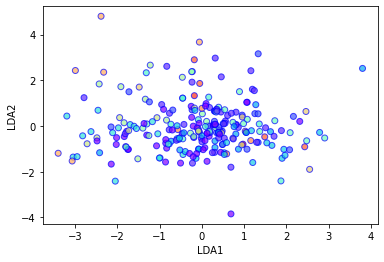

In [72]:
import matplotlib.pyplot as plt
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
c = y_train.map({"normal":0, "water": 1, "grass": 2, "physic": 3, "fire": 4,
"electric": 5, "fighting": 6, "bug": 7, "fairy": 8, "poison": 9, "ground": 10,
"dragon": 11, "ice": 12, "rock": 13, "dark": 14, "ghost": 15, "steel": 16, "flying": 17}),
cmap='rainbow',
   alpha=0.7,
edgecolors='b'
)

In [73]:
pred_train = lda_model.predict(X_train)

In [74]:
print(confusion_matrix(y_train, pred_train))

[[ 2  0  0  1  0  0  0  0  0  0  1  0  3  0  0  0  0  4]
 [ 0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0  0  2]
 [ 0  0  0  0  2  4  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  8  0  0  1  0  0  0  0  0  4  0  0  0  0  4]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  2  0  3  0  0  5]
 [ 0  0  0  0  0 12  1  0  0  0  0  0  6  0  0  0  0  1]
 [ 0  0  1  0  0  1  3  0  0  0  0  0  4  0  1  0  0 11]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  2  1  1  2  0  0  0  1  0  2  0  1  0  0 15]
 [ 0  0  0  0  0  2  0  0  0  0  2  0  2  0  0  1  0  1]
 [ 0  0  0  0  1  0  1  0  1  0  1  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  6  0  0  0  0  0  0 29  0  2  0  0 11]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  6  0  0  0  0  3]
 [ 0  0  0  2  1  0  1  0  1  0  0  0  3  0  7  0  0  3]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  3  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  1  0  0  0  0  1  0

In [75]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         bug       0.67      0.18      0.29        11
        dark       0.00      0.00      0.00         5
      dragon       0.00      0.00      0.00        10
    electric       0.47      0.47      0.47        17
       fairy       0.44      0.29      0.35        14
    fighting       0.41      0.60      0.49        20
        fire       0.27      0.14      0.19        21
      flying       0.00      0.00      0.00         1
       ghost       0.40      0.40      0.40         5
       grass       0.00      0.00      0.00        25
      ground       0.40      0.25      0.31         8
         ice       0.00      0.00      0.00         7
      normal       0.42      0.60      0.50        48
      poison       0.00      0.00      0.00        10
     psychic       0.41      0.39      0.40        18
        rock       0.60      0.43      0.50         7
       steel       0.00      0.00      0.00         1
       water       0.31    

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [76]:
pred_test = lda_model.predict(X_test)

In [77]:
print(confusion_matrix(y_test, pred_test))

[[ 2  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  3]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  1  0  1  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  2  0  0  5]
 [ 0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  1  0  1  0  0  0  0 10]
 [ 0  0  0  1  0  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  1  1  0  2]
 [ 0  0  0  0  0  3  0  0  1  0  0  0  6  0  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  4]
 [ 0  0  0  1  2  0  0  1  1  0  0  0  1  0  5  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  1  1  0  1  0  1  0

In [78]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         bug       1.00      0.29      0.44         7
        dark       0.00      0.00      0.00         4
      dragon       0.00      0.00      0.00         2
    electric       0.43      0.30      0.35        10
       fairy       0.20      0.50      0.29         2
    fighting       0.00      0.00      0.00         2
        fire       0.33      0.14      0.20         7
      flying       0.00      0.00      0.00         0
       ghost       0.20      0.25      0.22         4
       grass       0.00      0.00      0.00        13
      ground       0.00      0.00      0.00         4
         ice       0.00      0.00      0.00         5
      normal       0.33      0.46      0.39        13
      poison       0.00      0.00      0.00         5
     psychic       0.36      0.29      0.32        17
        rock       0.50      0.50      0.50         4
       steel       0.00      0.00      0.00         3
       water       0.07    

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg

In [79]:
model_accuracy = round(accuracy_score(y_test, pred_test) * 100, 2)
print(f"Accuracy Model 6 Features: {model_accuracy}%")

Accuracy Model 6 Features: 20.34%


In [80]:
pokemon_test = {
    "sp_attack": 75.3,
    "sp_defense": 51,
    "attack": 63,
    "defense": 47,
    "speed": 97,
    "hp": 66
}

pokemon_test = pd.Series(pokemon_test)
pokemon_test = scaler.transform([pokemon_test])
lda_model.predict(pokemon_test)

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['water'], dtype='<U8')

### 34 Features

In [53]:
feature_means1 = pd.DataFrame(columns=pokemon_34_features["type1"].drop_duplicates())
for c, rows in pokemon_34_features.groupby('type1'):
    feature_means1[c] = rows.mean()
feature_means1
# feature_means1[["rock", "grass"]]

/var/folders/vg/rrvy5r0s275_mqld96rv7s9r0000gn/T/ipykernel_3139/1371883649.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means1[c] = rows.mean()


type1,fire,water,bug,poison,electric,fairy,ground,fighting,psychic,normal,grass,dragon,rock,dark,ghost,ice,steel,flying
against_bug,5.000000e-01,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,0.5000,1.000000e+00,5.000000e-01,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000,2.000000e+00,0.500000,1.000000e+00,0.50,0.5
against_dark,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.5000,1.000000e+00,5.000000e-01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,5.000000e-01,2.000000,1.000000e+00,1.00,1.0
against_dragon,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,0.50,1.0
against_electric,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,1.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,1.000000,1.000000e+00,1.000000,1.000000e+00,1.00,2.0
against_fairy,5.000000e-01,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00,1.0000,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000,2.000000e+00,1.000000,1.000000e+00,0.50,1.0
against_fight,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,0.5000,1.000000e+00,1.000000e+00,5.000000e-01,2.000000e+00,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,0.000000,2.000000e+00,2.00,0.5
against_fire,5.000000e-01,5.000000e-01,2.000000e+00,1.000000e+00,1.000000e+00,1.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e-01,0.500000,1.000000e+00,1.000000,2.000000e+00,2.00,1.0
against_flying,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,1.0000,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.500000,1.000000e+00,1.000000,1.000000e+00,0.50,1.0
against_ghost,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,5.000000e-01,2.000000,1.000000e+00,1.00,1.0
against_grass,5.000000e-01,2.000000e+00,5.000000e-01,5.000000e-01,1.000000e+00,1.0000,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,2.000000,1.000000e+00,1.000000,1.000000e+00,0.50,0.5


In [55]:
pokemon_34_features.dropna(inplace = True)
X = pokemon_34_features.drop(["type1"], axis = 1)
y = pokemon_34_features["type1"]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)
lda_model = LinearDiscriminantAnalysis(n_components = 15)
X_lda = lda_model.fit_transform(X_train, y_train)

In [58]:
lda_model.explained_variance_ratio_

array([9.22874809e-01, 4.62192419e-02, 1.63368113e-02, 8.02367651e-03,
       4.70190986e-03, 6.65182756e-04, 4.53739690e-04, 3.15429029e-04,
       2.14134442e-04, 9.86915831e-05, 4.34291343e-05, 3.44079753e-05,
       1.28917432e-05, 5.13746425e-06, 5.07658055e-07])

In [59]:
pred_train = lda_model.predict(X_train)

In [60]:
print(confusion_matrix(y_train, pred_train))

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 43]]


In [61]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         bug       1.00      1.00      1.00         9
        dark       1.00      1.00      1.00         5
      dragon       1.00      1.00      1.00         8
    electric       1.00      1.00      1.00        17
       fairy       1.00      1.00      1.00        11
    fighting       1.00      1.00      1.00        13
        fire       1.00      1.00      1.00        18
       ghost       1.00      1.00      1.00         8
       grass       1.00      1.00      1.00        21
      ground       1.00      1.00      1.00         7
         ice       1.00      1.00      1.00         8
      normal       1.00      1.00      1.00        37
      poison       1.00      1.00      1.00        11
     psychic       1.00      1.00      1.00        19
        rock       1.00      1.00      1.00         7
       water       1.00      1.00      1.00        43

    accuracy                           1.00       242
   macro avg       1.00   

In [62]:
pred_test = lda_model.predict(X_test)

In [63]:
print(confusion_matrix(y_test, pred_test))

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 13]]


In [64]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         bug       0.90      1.00      0.95         9
        dark       1.00      1.00      1.00         3
      dragon       1.00      1.00      1.00         4
    electric       1.00      1.00      1.00         5
       fairy       1.00      1.00      1.00         4
    fighting       1.00      1.00      1.00         9
        fire       1.00      1.00      1.00         9
      flying       0.00      0.00      0.00         1
       ghost       1.00      1.00      1.00         1
       grass       1.00      1.00      1.00        16
      ground       1.00      1.00      1.00         2
         ice       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00        16
      poison       1.00      1.00      1.00         2
     psychic       1.00      1.00      1.00         6
        rock       1.00      1.00      1.00         2
       water       1.00      1.00      1.00        13

    accuracy              

/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [66]:
model_accuracy = round(accuracy_score(y_test, pred_test) * 100, 2)
print(f"Accuracy Model 34 Features: {model_accuracy}%")

Accuracy: 99.04%


## Base Breast Cancer

In [88]:
breast_cancer = load_breast_cancer()
data = breast_cancer.data
target = breast_cancer.target
cols = breast_cancer.feature_names

In [89]:
breast_cancer_df = pd.DataFrame(data = data, columns = cols)
breast_cancer_df["target"] = target

In [90]:
breast_cancer_df.shape

(569, 31)

In [91]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
test = breast_cancer_df[["mean radius", 'mean concave points', "target"]]

In [95]:
test.groupby("target").mean()

,mean radius,mean concave points
target,,
0,17.462830,0.087990
1,12.146524,0.025717


In [96]:
X_breast_cancer = test.drop(["target"], axis = 1)
y_breast_cancer= test["target"]

In [97]:
X_train_breast_cancer, X_test_breast_cancer, y_train_breast_cancer, y_test_breast_cancer = train_test_split(X_breast_cancer, y_breast_cancer, test_size=0.3, random_state=4)

In [98]:
logreg = LogisticRegression(random_state=0,max_iter = 1000)
logreg.fit(X_train_breast_cancer, y_train_breast_cancer)

LogisticRegression(max_iter=1000, random_state=0)

In [99]:
y_pred_breast_cancer = logreg.predict(X_test_breast_cancer)

In [100]:
print(confusion_matrix(y_test_breast_cancer, y_pred_breast_cancer))

[[ 41  13]
 [ 14 103]]


In [101]:
print(classification_report(y_test_breast_cancer, y_pred_breast_cancer))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        54
           1       0.89      0.88      0.88       117

    accuracy                           0.84       171
   macro avg       0.82      0.82      0.82       171
weighted avg       0.84      0.84      0.84       171



In [102]:
accuracy_score = round(accuracy_score(y_test_breast_cancer, y_pred_breast_cancer) * 100, 2)
print(f"Accuracy: {accuracy_score}%")

Accuracy: 84.21%


In [104]:
test_woman_A = {
    "mean radius": 16, 
    'mean concave points': 0.19
}

test_woman_B = {
    "mean radius": 11.65, 
    'mean concave points': 0.25
}

test_woman_A = pd.Series(test_woman_A)
test_woman_B = pd.Series(test_woman_B)
print(logreg.predict([test_woman_A]))
print(logreg.predict([test_woman_B]))

[0]
[1]


/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/matthiascleinespinoza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
